In [1]:
import pickle

# Load the DataFrame from the pickle file
file_path = "/Users/sharanmehta/Desktop/UIUC/FALL 2024/CS 412/project/Data/combined_df_final.pkl"  # Adjust this if your file path is different

with open(file_path, "rb") as f:
    combined_df = pickle.load(f)
    
# Display basic information about the DataFrame
print("DataFrame Info:")
combined_df.info()

print("\nFirst 5 Rows of the DataFrame:")
print(combined_df.head())

# Check for missing values
print("\nMissing Values Report:")
print(combined_df.isnull().sum())

# Display summary statistics for numeric columns
print("\nSummary Statistics:")
print(combined_df.describe())

# Check column names and types
print("\nColumns and Data Types:")
print(combined_df.dtypes)

# Display unique values for categorical columns (if applicable)
categorical_columns = combined_df.select_dtypes(include=['object', 'category']).columns
print("\nUnique Values in Categorical Columns:")
for col in categorical_columns:
    print(f"{col}: {combined_df[col].nunique()} unique values")


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11545 entries, 0 to 11544
Columns: 862 entries, id to away_player_11_rolling_avg_last_5_shotoff
dtypes: datetime64[ns](1), float64(827), int64(8), object(26)
memory usage: 75.9+ MB

First 5 Rows of the DataFrame:
     id  country_id  league_id     season  stage       date  match_api_id  \
0  7955        7809       7809  2008/2009     24 2009-03-14        499526   
1  7837        7809       7809  2008/2009     12 2008-11-09        499417   
2  7886        7809       7809  2008/2009     17 2008-12-13        499466   
3  8082        7809       7809  2008/2009      6 2008-09-27        499365   
4  7990        7809       7809  2008/2009     28 2009-04-19        499561   

   missing_data_flag  potential_data_missing_flag match_result  ...  \
0                  0                            1     Home Win  ...   
1                  0                            1     Home Win  ...   
2                  0                         

In [2]:
import pandas as pd

# Display 1 random row with all columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print("Displaying a random row of the DataFrame:")
    print(combined_df.sample(n=1, random_state=42))  # Use `random_state` for reproducibility


Displaying a random row of the DataFrame:
         id  country_id  league_id     season  stage       date  match_api_id  \
6887  11813       10257      10257  2012/2013     14 2012-11-25       1287105   

      missing_data_flag  potential_data_missing_flag match_result  \
6887                  0                            1     Home Win   

      match_result_numeric  home_team_form  away_team_form  \
6887                     1            -0.6            -0.4   

      home_team_home_form  away_team_away_form  head_to_head  \
6887                 -0.4                 -1.0           0.2   

      days_rested_home  days_rested_away  buildUpPlaySpeed_home  \
6887               7.0              14.0                   35.0   

     buildUpPlaySpeedClass_home  buildUpPlayDribbling_home  \
6887                   Balanced                        0.0   

     buildUpPlayDribblingClass_home  buildUpPlayPassing_home  \
6887                         Little                     35.0   

     buildUpP

In [3]:
all_columns = combined_df.columns.tolist()
len(all_columns), all_columns

(862,
 ['id',
  'country_id',
  'league_id',
  'season',
  'stage',
  'date',
  'match_api_id',
  'missing_data_flag',
  'potential_data_missing_flag',
  'match_result',
  'match_result_numeric',
  'home_team_form',
  'away_team_form',
  'home_team_home_form',
  'away_team_away_form',
  'head_to_head',
  'days_rested_home',
  'days_rested_away',
  'buildUpPlaySpeed_home',
  'buildUpPlaySpeedClass_home',
  'buildUpPlayDribbling_home',
  'buildUpPlayDribblingClass_home',
  'buildUpPlayPassing_home',
  'buildUpPlayPassingClass_home',
  'buildUpPlayPositioningClass_home',
  'chanceCreationPassing_home',
  'chanceCreationPassingClass_home',
  'chanceCreationCrossing_home',
  'chanceCreationCrossingClass_home',
  'chanceCreationShooting_home',
  'chanceCreationShootingClass_home',
  'chanceCreationPositioningClass_home',
  'defencePressure_home',
  'defencePressureClass_home',
  'defenceAggression_home',
  'defenceAggressionClass_home',
  'defenceTeamWidth_home',
  'defenceTeamWidthClass_hom

In [4]:
# Define the columns to drop
columns_to_drop = [ 
    'country_id', 
    'buildUpPlaySpeedClass_home',
    'buildUpPlayDribblingClass_home',
    'buildUpPlayPassingClass_home',
    'buildUpPlayPositioningClass_home',
    'chanceCreationPassingClass_home',
    'chanceCreationCrossingClass_home',
    'chanceCreationShootingClass_home',
    'chanceCreationPositioningClass_home',
    'defencePressureClass_home',
    'defenceAggressionClass_home',
    'defenceTeamWidthClass_home',
    'defenceDefenderLineClass_home',
    'buildUpPlaySpeedClass_away',
    'buildUpPlayDribblingClass_away',
    'buildUpPlayPassingClass_away',
    'buildUpPlayPositioningClass_away',
    'chanceCreationPassingClass_away',
    'chanceCreationCrossingClass_away',
    'chanceCreationShootingClass_away',
    'chanceCreationPositioningClass_away',
    'defencePressureClass_away',
    'defenceAggressionClass_away',
    'defenceTeamWidthClass_away',
    'defenceDefenderLineClass_away'
]

# Drop the specified columns from the DataFrame
combined_df_cleaned = combined_df.drop(columns=columns_to_drop, errors='ignore')

# Display the remaining columns to confirm the drop
remaining_columns = combined_df_cleaned.columns.tolist()
remaining_columns[:10], len(remaining_columns)

(['id',
  'league_id',
  'season',
  'stage',
  'date',
  'match_api_id',
  'missing_data_flag',
  'potential_data_missing_flag',
  'match_result',
  'match_result_numeric'],
 837)

In [6]:
# Use the remaining_columns list to identify columns
metadata_columns = [
    "id", "league_id", "season", "date", "stage", "match_api_id",
    "missing_data_flag", "potential_data_missing_flag", "match_result"
]
label_column = "match_result_numeric"

# Filter model features from the remaining_columns list
model_features = [col for col in remaining_columns if col not in metadata_columns + [label_column]]

# Verify the results
print(f"Metadata Columns: {metadata_columns}")
print(f"Label Column: {label_column}")
print(f"Number of Model Features: {len(model_features)}")


Metadata Columns: ['id', 'league_id', 'season', 'date', 'stage', 'match_api_id', 'missing_data_flag', 'potential_data_missing_flag', 'match_result']
Label Column: match_result_numeric
Number of Model Features: 827


In [7]:
# Handle NaN values in features
combined_df[model_features] = combined_df[model_features].fillna(0)

# Add 1 to all values in the match_result_numeric column
combined_df["match_result_numeric"] = combined_df["match_result_numeric"] + 1

# Verify changes
print("Any NaN in combined_df features?", combined_df[model_features].isnull().any().any())
print("Unique values in match_result_numeric after adjustment:", combined_df["match_result_numeric"].unique())

Any NaN in combined_df features? False
Unique values in match_result_numeric after adjustment: [2 0 1]


In [8]:
# Identify non-numeric columns in model_features
non_numeric_features = [col for col in model_features if not pd.api.types.is_numeric_dtype(combined_df[col])]

# Print the column names and their unique value counts
print("Non-numeric columns and their unique value counts:")
for col in non_numeric_features:
    print(f"{col}: {combined_df[col].nunique()} unique values")

print(f"\nTotal number of non-numeric features: {len(non_numeric_features)}")

Non-numeric columns and their unique value counts:

Total number of non-numeric features: 0


In [9]:
# Split the DataFrame
features_df = combined_df[model_features]
metadata_df = combined_df[metadata_columns]
labels_df = combined_df[[label_column]]

I built training and test sets for each league by season. The first 70% of the season is training and the remaining 30% is test. Below is a function to merge any two datasets and sort by date. 

In [10]:
def create_splits_by_league(combined_df):
    """
    Create training, validation, and test splits for each league.

    Args:
        combined_df (pd.DataFrame): The full combined DataFrame with metadata, features, and labels.

    Returns:
        dict: Training sets for each league.
        dict: Validation sets for each league.
        dict: Test sets for each league.
    """
    # Define season groupings
    training_seasons = ["2008/2009", "2009/2010", "2010/2011", "2011/2012"]
    validation_seasons = ["2012/2013", "2013/2014"]
    testing_seasons = ["2014/2015", "2015/2016"]
    
    # Initialize dictionaries to store splits
    train_sets = {}
    val_sets = {}
    test_sets = {}

    # Group data by league_id
    leagues = combined_df["league_id"].unique()
    
    for league_id in leagues:
        # Filter data for the current league
        league_data = combined_df[combined_df["league_id"] == league_id]
        
        # Split the league data by seasons
        train_set = league_data[league_data["season"].isin(training_seasons)].sort_values(by="date")
        val_set = league_data[league_data["season"].isin(validation_seasons)].sort_values(by="date")
        test_set = league_data[league_data["season"].isin(testing_seasons)].sort_values(by="date")
        
        # Store the splits in the corresponding dictionaries
        train_sets[league_id] = train_set
        val_sets[league_id] = val_set
        test_sets[league_id] = test_set
    
    return train_sets, val_sets, test_sets


# Create the splits
final_train_sets, final_val_sets, final_test_sets = create_splits_by_league(combined_df)

# Example output for a single league
example_league_id = list(final_train_sets.keys())[0]
print(f"League ID: {example_league_id}")
print("Training Set Shape:", final_train_sets[example_league_id].shape)
print("Validation Set Shape:", final_val_sets[example_league_id].shape)
print("Test Set Shape:", final_test_sets[example_league_id].shape)


League ID: 7809
Training Set Shape: (1224, 862)
Validation Set Shape: (612, 862)
Test Set Shape: (612, 862)


Over here we create training-val-test sets to create a baseline model. 50% of the data is training data. 25% is validation. 25% is test.

Next we will build some base models. 

Our first model will be trained on each league seperately

Our next model will be trained on all the leagues simaltaneously

In [11]:
# Prepare inputs
league_inputs = {}

# Iterate over leagues
for league_id in final_train_sets.keys():
    # Extract the training, validation, and test sets
    train_df = final_train_sets[league_id]
    val_df = final_val_sets[league_id]
    test_df = final_test_sets[league_id]
    
    # Separate features and labels
    X_train = train_df[model_features]
    y_train = train_df[label_column]
    
    X_val = val_df[model_features]
    y_val = val_df[label_column]
    
    X_test = test_df[model_features]
    y_test = test_df[label_column]
    
    # Store prepared data for this league
    league_inputs[league_id] = {
        "X_train": X_train,
        "y_train": y_train,
        "X_val": X_val,
        "y_val": y_val,
        "X_test": X_test,
        "y_test": y_test,
        "metadata_train": train_df[metadata_columns],
        "metadata_val": val_df[metadata_columns],
        "metadata_test": test_df[metadata_columns],
    }

# Example: Summarize the shape of data for each league
for league_id, data in league_inputs.items():
    print(f"League {league_id}:")
    print(f"  Training Features Shape: {data['X_train'].shape}")
    print(f"  Training Labels Shape: {data['y_train'].shape}")
    print(f"  Validation Features Shape: {data['X_val'].shape}")
    print(f"  Validation Labels Shape: {data['y_val'].shape}")
    print(f"  Test Features Shape: {data['X_test'].shape}")
    print(f"  Test Labels Shape: {data['y_test'].shape}")


League 7809:
  Training Features Shape: (1224, 827)
  Training Labels Shape: (1224,)
  Validation Features Shape: (612, 827)
  Validation Labels Shape: (612,)
  Test Features Shape: (612, 827)
  Test Labels Shape: (612,)
League 21518:
  Training Features Shape: (1520, 827)
  Training Labels Shape: (1520,)
  Validation Features Shape: (760, 827)
  Validation Labels Shape: (760,)
  Test Features Shape: (760, 827)
  Test Labels Shape: (760,)
League 1729:
  Training Features Shape: (1520, 827)
  Training Labels Shape: (1520,)
  Validation Features Shape: (760, 827)
  Validation Labels Shape: (760,)
  Test Features Shape: (760, 827)
  Test Labels Shape: (760,)
League 10257:
  Training Features Shape: (1498, 827)
  Training Labels Shape: (1498,)
  Validation Features Shape: (760, 827)
  Validation Labels Shape: (760,)
  Test Features Shape: (759, 827)
  Test Labels Shape: (759,)


In [12]:
# !pip install scikit-learn

In [13]:
import numpy as np 

# Now check if there are any NaNs left
for league_id, data in league_inputs.items():
    nan_count = np.isnan(data["X_train"]).sum()
    print(f"Checking for NaN values in X_train for League {league_id}: {nan_count}")

Checking for NaN values in X_train for League 7809: home_team_form                                      0
away_team_form                                      0
home_team_home_form                                 0
away_team_away_form                                 0
head_to_head                                        0
                                                   ..
away_player_11_rolling_avg_last_5_own_goals         0
away_player_11_rolling_avg_last_5_penalty_goals     0
away_player_11_rolling_avg_last_5_goals_assisted    0
away_player_11_cumulative_shotoff                   0
away_player_11_rolling_avg_last_5_shotoff           0
Length: 827, dtype: int64
Checking for NaN values in X_train for League 21518: home_team_form                                      0
away_team_form                                      0
home_team_home_form                                 0
away_team_away_form                                 0
head_to_head                                        0
     

In [14]:
from sklearn.preprocessing import StandardScaler

# Apply normalization to features for each league
normalized_league_inputs = {}

for league_id, data in league_inputs.items():
    
    # Initialize the scaler
    scaler = StandardScaler()
    
    # Fit the scaler on the training data
    X_train_scaled = scaler.fit_transform(data["X_train"])
    
    # Transform the validation and test data using the same scaler
    X_val_scaled = scaler.transform(data["X_val"])
    X_test_scaled = scaler.transform(data["X_test"])
    
    # Store the normalized data
    normalized_league_inputs[league_id] = {
        "X_train": X_train_scaled,
        "y_train": data["y_train"],
        "X_val": X_val_scaled,
        "y_val": data["y_val"],
        "X_test": X_test_scaled,
        "y_test": data["y_test"],
        "metadata_train": data["metadata_train"],
        "metadata_val": data["metadata_val"],
        "metadata_test": data["metadata_test"],
    }

# Example: Verify normalization for one league
example_league_id = list(normalized_league_inputs.keys())[0]
print(f"League {example_league_id}:")
print("Training Features (first 5 rows):")
print(normalized_league_inputs[example_league_id]["X_train"][:5])
print("Validation Features (first 5 rows):")
print(normalized_league_inputs[example_league_id]["X_val"][:5])
print("Test Features (first 5 rows):")
print(normalized_league_inputs[example_league_id]["X_test"][:5])

League 7809:
Training Features (first 5 rows):
[[ 0.0212488  -0.03914021 -0.32593758 ... -0.34472643 -0.82391772
  -0.82477021]
 [ 0.0212488  -0.03914021 -0.32593758 ... -0.34472643 -0.82391772
  -0.82477021]
 [ 0.0212488  -0.03914021 -0.32593758 ... -0.34472643 -0.82391772
  -0.82477021]
 [ 0.0212488  -0.03914021 -0.32593758 ... -0.34472643 -0.82391772
  -0.82477021]
 [ 0.0212488  -0.03914021 -0.32593758 ... -0.34472643 -0.82391772
  -0.82477021]]
Validation Features (first 5 rows):
[[ 2.31274986 -1.85841675  1.39428205 ... -0.34472643 -0.82391772
  -0.82477021]
 [ 0.47954902 -0.03914021  0.53417223 ... -0.34472643 -0.82391772
  -0.82477021]
 [-1.81195204  1.78013633 -0.32593758 ... -0.34472643 -0.82391772
  -0.82477021]
 [ 0.0212488   0.87049806 -0.32593758 ... -0.34472643 -0.82391772
  -0.82477021]
 [ 0.47954902 -0.03914021  0.96422714 ... -0.34472643 -0.82391772
  -0.82477021]]
Test Features (first 5 rows):
[[ 1.39614944  1.78013633  0.53417223 ... -0.34472643 -0.82391772
  -0.8247

In [15]:
# Check all unique labels in the training set for each league
for league_id, data in league_inputs.items():
    print(f"Unique labels in training data for League {league_id}: {np.unique(data['y_train'])}")

Unique labels in training data for League 7809: [0 1 2]
Unique labels in training data for League 21518: [0 1 2]
Unique labels in training data for League 1729: [0 1 2]
Unique labels in training data for League 10257: [0 1 2]


In [16]:
# !pip install tqdm

In [17]:
# !pip install ipywidgets

In [18]:
# !pip install matplotlib

In [22]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tqdm.keras import TqdmCallback
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", 
                                 factor=0.5,         # Reduce learning rate by 50%
                                 patience=3,         # Wait for 3 epochs before reducing
                                 verbose=1,          # Print a message when the learning rate is reduced
                                 min_lr=1e-6)        # Set a lower bound for the learning rate


# Store trained models for each league
trained_models = {}

for league_id, data in adjusted_league_inputs.items():  # Use adjusted_league_inputs instead of normalized_league_inputs
    print(f"Training model for League {league_id}...")
    
    # Define model architecture
    model = Sequential([
        Input(shape=(data["X_train"].shape[1],)),
        Dense(256, kernel_regularizer=l2(0.3)),  # Add L2 regularization
        BatchNormalization(),
        LeakyReLU(),
        Dropout(0.4),
        Dense(128, kernel_regularizer=l2(0.3)),  # Add L2 regularization
        BatchNormalization(),
        LeakyReLU(),
        Dropout(0.4),
        Dense(64, kernel_regularizer=l2(0.3)),  # Add L2 regularization
        BatchNormalization(),
        LeakyReLU(),
        Dense(3, activation="softmax") # 3 classes: Home Win, Draw, Away Win
    ])
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    # Set up the ModelCheckpoint callback to save the best model based on validation accuracy
    checkpoint = ModelCheckpoint(
        "best_model.keras",  # The file where the model will be saved
        monitor="val_accuracy",  # Monitor validation accuracy
        save_best_only=True,  # Only save the model if the validation accuracy improves
        mode="max",  # Save the model with the highest validation accuracy
        verbose=1  # Print a message when saving the model
    )
    
    # Train the model
    history = model.fit(
        data["X_train"], data["y_train"],
        validation_data=(data["X_val"], data["y_val"]),
        epochs=100,
        batch_size=128,
        callbacks=[checkpoint, TqdmCallback()],
        verbose=0
    )
    
    # Load the best model from the checkpoint
    best_model = tf.keras.models.load_model("best_model.keras")
    
    # Evaluate the best model on the test set
    test_loss, test_accuracy = best_model.evaluate(data["X_test"], data["y_test"], verbose=0)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
    
    # Save the trained model and history
    trained_models[league_id] = {
        "model": model,
        "history": history,
        "test_loss": test_loss,
        "test_accuracy": test_accuracy
    }


NameError: name 'adjusted_league_inputs' is not defined

In [37]:
'''
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Add
from tensorflow.keras.models import Model

# Define the ResNet model for tabular data
def build_resnet_model(input_dim, n_classes=3):
    inputs = Input(shape=(input_dim,))
    
    # First dense layer
    x = Dense(256, activation="relu", kernel_regularizer=l2(0.3))(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    # Residual Block 1
    residual = x
    x = Dense(256, activation="relu", kernel_regularizer=l2(0.3))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    x = Dense(256, activation=None, kernel_regularizer=l2(0.3))(x)
    x = BatchNormalization()(x)
    x = Add()([x, residual])  # Skip connection
    x = Dropout(0.4)(x)

    # Residual Block 2
    residual = Dense(128, activation=None, kernel_regularizer=l2(0.3))(x) 
    residual = BatchNormalization()(residual)
    x = Dense(128, activation="relu", kernel_regularizer=l2(0.3))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    x = Dense(128, activation=None, kernel_regularizer=l2(0.3))(x)
    x = BatchNormalization()(x)
    x = Add()([x, residual])  # Skip connection
    x = Dropout(0.4)(x)

    # Final Dense Layers
    x = Dense(64, activation="relu", kernel_regularizer=l2(0.3))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    outputs = Dense(n_classes, activation="softmax")(x)

    model = Model(inputs, outputs)
    return model
'''

'\nfrom tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Add\nfrom tensorflow.keras.models import Model\n\n# Define the ResNet model for tabular data\ndef build_resnet_model(input_dim, n_classes=3):\n    inputs = Input(shape=(input_dim,))\n    \n    # First dense layer\n    x = Dense(256, activation="relu", kernel_regularizer=l2(0.3))(inputs)\n    x = BatchNormalization()(x)\n    x = Dropout(0.4)(x)\n\n    # Residual Block 1\n    residual = x\n    x = Dense(256, activation="relu", kernel_regularizer=l2(0.3))(x)\n    x = BatchNormalization()(x)\n    x = Dropout(0.4)(x)\n    x = Dense(256, activation=None, kernel_regularizer=l2(0.3))(x)\n    x = BatchNormalization()(x)\n    x = Add()([x, residual])  # Skip connection\n    x = Dropout(0.4)(x)\n\n    # Residual Block 2\n    residual = Dense(128, activation=None, kernel_regularizer=l2(0.3))(x) \n    residual = BatchNormalization()(residual)\n    x = Dense(128, activation="relu", kernel_regularizer=l2(0.3))(x)\n    x

In [38]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

def build_resnet_model(input_dim, n_classes=3):
    inputs = Input(shape=(input_dim,))
    
    # First dense layer with reduced size
    x = Dense(128, activation="relu", kernel_regularizer=l2(0.4))(inputs)  # Reduced from 256 to 128
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    # Residual Block 1
    residual = x
    x = Dense(128, activation="relu", kernel_regularizer=l2(0.4))(x)  # Reduced from 256 to 128
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    x = Dense(128, activation=None, kernel_regularizer=l2(0.4))(x)
    x = BatchNormalization()(x)
    residual = BatchNormalization()(residual)  # Normalize the residual path
    x = Add()([x, residual])  # Skip connection
    x = Dropout(0.4)(x)

    # Residual Block 2
    residual = x
    x = Dense(64, activation="relu", kernel_regularizer=l2(0.4))(x)  # Reduced from 128 to 64
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    x = Dense(64, activation=None, kernel_regularizer=l2(0.4))(x)
    x = BatchNormalization()(x)
    residual = Dense(64, activation=None, kernel_regularizer=l2(0.4))(residual)  # Match dimensions
    residual = BatchNormalization()(residual)  # Normalize the residual path
    x = Add()([x, residual])  # Skip connection
    x = Dropout(0.4)(x)

    # Final Dense Layers
    x = Dense(32, activation="relu", kernel_regularizer=l2(0.4))(x)  # Reduced from 64 to 32
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    outputs = Dense(n_classes, activation="softmax")(x)

    model = Model(inputs, outputs)
    return model


In [134]:
# Update model building to use the ResNet architecture
for league_id, data in adjusted_league_inputs.items():  # Use adjusted_league_inputs instead of normalized_league_inputs
    print(f"Training model for League {league_id}...")
    
    # Build ResNet model
    model = build_resnet_model(input_dim=data["X_train"].shape[1])
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    # Set up the ModelCheckpoint callback to save the best model based on validation accuracy
    checkpoint = ModelCheckpoint(
        "best_model.keras",  # The file where the model will be saved
        monitor="val_accuracy",  # Monitor validation accuracy
        save_best_only=True,  # Only save the model if the validation accuracy improves
        mode="max",  # Save the model with the highest validation accuracy
        verbose=1  # Print a message when saving the model
    )
    
    # Train the model
    history = model.fit(
        data["X_train"], data["y_train"],
        validation_data=(data["X_val"], data["y_val"]),
        epochs=70,
        batch_size=128,
        callbacks=[checkpoint, TqdmCallback()],
        verbose=0
    )
    
    # Load the best model from the checkpoint
    best_model = tf.keras.models.load_model("best_model.keras")
    
    # Evaluate the best model on the test set
    test_loss, test_accuracy = best_model.evaluate(data["X_test"], data["y_test"], verbose=0)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
    
    # Save the trained model and history
    trained_models[league_id] = {
        "model": model,
        "history": history,
        "test_loss": test_loss,
        "test_accuracy": test_accuracy
    }


Training model for League 7809...


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]


Epoch 1: val_accuracy improved from -inf to 0.23529, saving model to best_model.keras

Epoch 2: val_accuracy improved from 0.23529 to 0.27288, saving model to best_model.keras

Epoch 3: val_accuracy improved from 0.27288 to 0.43791, saving model to best_model.keras

Epoch 4: val_accuracy improved from 0.43791 to 0.44935, saving model to best_model.keras

Epoch 5: val_accuracy did not improve from 0.44935

Epoch 6: val_accuracy did not improve from 0.44935

Epoch 7: val_accuracy did not improve from 0.44935

Epoch 8: val_accuracy did not improve from 0.44935

Epoch 9: val_accuracy did not improve from 0.44935

Epoch 10: val_accuracy did not improve from 0.44935

Epoch 11: val_accuracy did not improve from 0.44935

Epoch 12: val_accuracy did not improve from 0.44935

Epoch 13: val_accuracy did not improve from 0.44935

Epoch 14: val_accuracy did not improve from 0.44935

Epoch 15: val_accuracy did not improve from 0.44935

Epoch 16: val_accuracy did not improve from 0.44935

Epoch 17: v

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]


Epoch 1: val_accuracy improved from -inf to 0.37632, saving model to best_model.keras

Epoch 2: val_accuracy improved from 0.37632 to 0.38947, saving model to best_model.keras

Epoch 3: val_accuracy improved from 0.38947 to 0.41184, saving model to best_model.keras

Epoch 4: val_accuracy improved from 0.41184 to 0.49605, saving model to best_model.keras

Epoch 5: val_accuracy improved from 0.49605 to 0.50789, saving model to best_model.keras

Epoch 6: val_accuracy did not improve from 0.50789

Epoch 7: val_accuracy did not improve from 0.50789

Epoch 8: val_accuracy did not improve from 0.50789

Epoch 9: val_accuracy did not improve from 0.50789

Epoch 10: val_accuracy did not improve from 0.50789

Epoch 11: val_accuracy did not improve from 0.50789

Epoch 12: val_accuracy did not improve from 0.50789

Epoch 13: val_accuracy did not improve from 0.50789

Epoch 14: val_accuracy did not improve from 0.50789

Epoch 15: val_accuracy did not improve from 0.50789

Epoch 16: val_accuracy did

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]


Epoch 1: val_accuracy improved from -inf to 0.38158, saving model to best_model.keras

Epoch 2: val_accuracy improved from 0.38158 to 0.38684, saving model to best_model.keras

Epoch 3: val_accuracy did not improve from 0.38684

Epoch 4: val_accuracy did not improve from 0.38684

Epoch 5: val_accuracy did not improve from 0.38684

Epoch 6: val_accuracy did not improve from 0.38684

Epoch 7: val_accuracy did not improve from 0.38684

Epoch 8: val_accuracy did not improve from 0.38684

Epoch 9: val_accuracy did not improve from 0.38684

Epoch 10: val_accuracy did not improve from 0.38684

Epoch 11: val_accuracy did not improve from 0.38684

Epoch 12: val_accuracy did not improve from 0.38684

Epoch 13: val_accuracy did not improve from 0.38684

Epoch 14: val_accuracy did not improve from 0.38684

Epoch 15: val_accuracy did not improve from 0.38684

Epoch 16: val_accuracy did not improve from 0.38684

Epoch 17: val_accuracy did not improve from 0.38684

Epoch 18: val_accuracy improved fr

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]


Epoch 1: val_accuracy improved from -inf to 0.47105, saving model to best_model.keras

Epoch 2: val_accuracy improved from 0.47105 to 0.47368, saving model to best_model.keras

Epoch 3: val_accuracy did not improve from 0.47368

Epoch 4: val_accuracy did not improve from 0.47368

Epoch 5: val_accuracy did not improve from 0.47368

Epoch 6: val_accuracy did not improve from 0.47368

Epoch 7: val_accuracy did not improve from 0.47368

Epoch 8: val_accuracy did not improve from 0.47368

Epoch 9: val_accuracy did not improve from 0.47368

Epoch 10: val_accuracy did not improve from 0.47368

Epoch 11: val_accuracy did not improve from 0.47368

Epoch 12: val_accuracy did not improve from 0.47368

Epoch 13: val_accuracy did not improve from 0.47368

Epoch 14: val_accuracy did not improve from 0.47368

Epoch 15: val_accuracy did not improve from 0.47368

Epoch 16: val_accuracy did not improve from 0.47368

Epoch 17: val_accuracy did not improve from 0.47368

Epoch 18: val_accuracy did not imp

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tqdm.keras import TqdmCallback
from tensorflow.keras.regularizers import l2

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", 
                                 factor=0.5,         # Reduce learning rate by 50%
                                 patience=3,         # Wait for 3 epochs before reducing
                                 verbose=1,          # Print a message when the learning rate is reduced
                                 min_lr=1e-6)        # Set a lower bound for the learning rate


# Store trained models for each league
trained_models = {}

for league_id, data in adjusted_league_inputs.items():  # Use adjusted_league_inputs instead of normalized_league_inputs
    print(f"Training model for League {league_id}...")
    
    # Define model architecture with more layers and reduced regularization
    model = Sequential([
        Input(shape=(data["X_train"].shape[1],)),
        
        # Increased capacity with more layers and neurons
        Dense(256, kernel_regularizer=l2(0.01)),  # Reduced L2 regularization
        BatchNormalization(),
        LeakyReLU(negative_slope=0.01),
        Dropout(0.3),  # Reduced dropout to retain more information
        
        Dense(128, kernel_regularizer=l2(0.01)),  # Reduced L2 regularization
        BatchNormalization(),
        LeakyReLU(negative_slope=0.01),
        Dropout(0.3),  # Reduced dropout
        
        Dense(64, kernel_regularizer=l2(0.01)),  # Reduced L2 regularization
        BatchNormalization(),
        LeakyReLU(negative_slope=0.01),
        
        Dense(32, kernel_regularizer=l2(0.01)),  # Reduced L2 regularization
        BatchNormalization(),
        LeakyReLU(negative_slope=0.01),
        
        Dense(3, activation="softmax")  # 3 classes: Home Win, Draw, Away Win
    ])
    
    # Compile the model with Nadam optimizer (which may speed up convergence)
    model.compile(optimizer=Nadam(learning_rate=0.002), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    # Set up the ModelCheckpoint callback to save the best model based on validation accuracy
    checkpoint = ModelCheckpoint(
        "best_model.keras",  # The file where the model will be saved
        monitor="val_accuracy",  # Monitor validation accuracy
        save_best_only=True,  # Only save the model if the validation accuracy improves
        mode="max",  # Save the model with the highest validation accuracy
        verbose=1  # Print a message when saving the model
    )

    # Set up EarlyStopping callback to stop training if validation loss doesn't improve
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model with the new architecture and increased epochs
    history = model.fit(
        data["X_train"], data["y_train"],
        validation_data=(data["X_val"], data["y_val"]),
        epochs=100,  # Increased number of epochs for better fitting
        batch_size=64,
        callbacks=[checkpoint, early_stopping, lr_scheduler, TqdmCallback()],
        verbose=0
    )
    
    # Load the best model from the checkpoint
    best_model = tf.keras.models.load_model("best_model.keras")
    
    # Evaluate the best model on the test set
    test_loss, test_accuracy = best_model.evaluate(data["X_test"], data["y_test"], verbose=0)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
    
    # Save the trained model and history
    trained_models[league_id] = {
        "model": model,
        "history": history,
        "test_loss": test_loss,
        "test_accuracy": test_accuracy
    }

Training model for League 7809...


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]


Epoch 1: val_accuracy improved from -inf to 0.49020, saving model to best_model.keras

Epoch 2: val_accuracy did not improve from 0.49020

Epoch 3: val_accuracy did not improve from 0.49020

Epoch 4: val_accuracy improved from 0.49020 to 0.49837, saving model to best_model.keras

Epoch 5: val_accuracy did not improve from 0.49837

Epoch 6: val_accuracy did not improve from 0.49837

Epoch 7: val_accuracy did not improve from 0.49837

Epoch 8: val_accuracy did not improve from 0.49837

Epoch 9: val_accuracy did not improve from 0.49837

Epoch 10: val_accuracy did not improve from 0.49837

Epoch 11: val_accuracy did not improve from 0.49837

Epoch 12: val_accuracy did not improve from 0.49837

Epoch 13: val_accuracy did not improve from 0.49837

Epoch 14: val_accuracy did not improve from 0.49837

Epoch 15: val_accuracy did not improve from 0.49837

Epoch 16: val_accuracy did not improve from 0.49837

Epoch 17: val_accuracy did not improve from 0.49837

Epoch 18: val_accuracy did not imp

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]


Epoch 1: val_accuracy improved from -inf to 0.31316, saving model to best_model.keras

Epoch 2: val_accuracy improved from 0.31316 to 0.33026, saving model to best_model.keras

Epoch 3: val_accuracy improved from 0.33026 to 0.43684, saving model to best_model.keras

Epoch 4: val_accuracy improved from 0.43684 to 0.52237, saving model to best_model.keras

Epoch 5: val_accuracy did not improve from 0.52237

Epoch 6: val_accuracy did not improve from 0.52237

Epoch 7: val_accuracy did not improve from 0.52237

Epoch 8: val_accuracy did not improve from 0.52237

Epoch 9: val_accuracy did not improve from 0.52237

Epoch 10: val_accuracy did not improve from 0.52237

Epoch 11: val_accuracy did not improve from 0.52237

Epoch 12: val_accuracy did not improve from 0.52237

Epoch 13: val_accuracy did not improve from 0.52237

Epoch 14: val_accuracy did not improve from 0.52237

Epoch 15: val_accuracy did not improve from 0.52237

Epoch 16: val_accuracy did not improve from 0.52237

Epoch 16: R

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]


Epoch 1: val_accuracy improved from -inf to 0.51842, saving model to best_model.keras

Epoch 2: val_accuracy did not improve from 0.51842

Epoch 3: val_accuracy did not improve from 0.51842

Epoch 4: val_accuracy did not improve from 0.51842

Epoch 5: val_accuracy did not improve from 0.51842

Epoch 6: val_accuracy did not improve from 0.51842

Epoch 7: val_accuracy did not improve from 0.51842

Epoch 8: val_accuracy did not improve from 0.51842

Epoch 9: val_accuracy did not improve from 0.51842

Epoch 10: val_accuracy did not improve from 0.51842

Epoch 11: val_accuracy did not improve from 0.51842

Epoch 12: val_accuracy did not improve from 0.51842

Epoch 13: val_accuracy did not improve from 0.51842

Epoch 14: val_accuracy did not improve from 0.51842

Epoch 15: val_accuracy did not improve from 0.51842

Epoch 16: val_accuracy did not improve from 0.51842

Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0010000000474974513.

Epoch 17: val_accuracy did not improve from 0.5

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]


Epoch 1: val_accuracy improved from -inf to 0.47895, saving model to best_model.keras

Epoch 2: val_accuracy improved from 0.47895 to 0.52105, saving model to best_model.keras

Epoch 3: val_accuracy did not improve from 0.52105

Epoch 4: val_accuracy did not improve from 0.52105

Epoch 5: val_accuracy did not improve from 0.52105

Epoch 6: val_accuracy did not improve from 0.52105

Epoch 7: val_accuracy did not improve from 0.52105

Epoch 8: val_accuracy did not improve from 0.52105

Epoch 9: val_accuracy did not improve from 0.52105

Epoch 10: val_accuracy did not improve from 0.52105

Epoch 11: val_accuracy did not improve from 0.52105

Epoch 12: val_accuracy did not improve from 0.52105

Epoch 13: val_accuracy did not improve from 0.52105

Epoch 14: val_accuracy did not improve from 0.52105

Epoch 15: val_accuracy did not improve from 0.52105

Epoch 16: val_accuracy did not improve from 0.52105

Epoch 17: val_accuracy did not improve from 0.52105

Epoch 18: val_accuracy did not imp

In [21]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tqdm.keras import TqdmCallback
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", 
                                 factor=0.1,         # Reduce learning rate by 10%
                                 patience=3,         # Wait for 3 epochs before reducing
                                 verbose=1,          # Print a message when the learning rate is reduced
                                 min_lr=1e-6)        # Set a lower bound for the learning rate


# Store trained models for each league
trained_models = {}

for league_id, data in adjusted_league_inputs.items():  # Use adjusted_league_inputs instead of normalized_league_inputs
    print(f"Training model for League {league_id}...")
    
    # Define model architecture with updated hyperparameters
    model = Sequential([
        Input(shape=(data["X_train"].shape[1],)),
        
        # Add layers with L2 regularization (λ = 0.4)
        Dense(256, kernel_regularizer=l2(0.4)),  # First Dense layer
        BatchNormalization(),
        LeakyReLU(alpha=0.01),  # LeakyReLU with α = 0.01
        Dropout(0.2),  # Dropout rate of 0.2
        
        Dense(64, kernel_regularizer=l2(0.4)),  # Second Dense layer
        BatchNormalization(),
        LeakyReLU(alpha=0.01),
        Dropout(0.2),
        
        Dense(16, kernel_regularizer=l2(0.4)),  # Third Dense layer
        BatchNormalization(),
        LeakyReLU(alpha=0.01),
        
        Dense(3, activation="softmax")  # Output layer (3 classes: Home Win, Draw, Away Win)
    ])
    
    # Compile the model with Adam optimizer and learning rate of 0.0005
    model.compile(optimizer=Adam(learning_rate=0.0005), 
                  loss="sparse_categorical_crossentropy", 
                  metrics=["accuracy"])

    # Set up the ModelCheckpoint callback to save the best model based on validation accuracy
    checkpoint = ModelCheckpoint(
        "best_model.keras",  # The file where the model will be saved
        monitor="val_accuracy",  # Monitor validation accuracy
        save_best_only=True,  # Only save the model if the validation accuracy improves
        mode="max",  # Save the model with the highest validation accuracy
        verbose=1  # Print a message when saving the model
    )
    
    # Set up EarlyStopping callback to stop training if validation loss doesn't improve
    early_stopping = EarlyStopping(monitor='val_loss', 
                                   patience=12,        # Number of epochs for change to happen
                                   min_delta=0.1,     # Minimum change considered as improvement
                                   restore_best_weights=True)  # Restore the best weights when stopping

    # Train the model with the new architecture and increased epochs
    history = model.fit(
        data["X_train"], data["y_train"],
        validation_data=(data["X_val"], data["y_val"]),
        epochs=60,  # Number of epochs set to 60
        batch_size=128,
        callbacks=[checkpoint, early_stopping, lr_scheduler, TqdmCallback()],
        verbose=0
    )
    
    # Load the best model from the checkpoint
    best_model = tf.keras.models.load_model("best_model.keras")
    
    # Evaluate the best model on the test set
    test_loss, test_accuracy = best_model.evaluate(data["X_test"], data["y_test"], verbose=0)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
    
    # Save the trained model and history
    trained_models[league_id] = {
        "model": model,
        "history": history,
        "test_loss": test_loss,
        "test_accuracy": test_accuracy
    }

NameError: name 'adjusted_league_inputs' is not defined

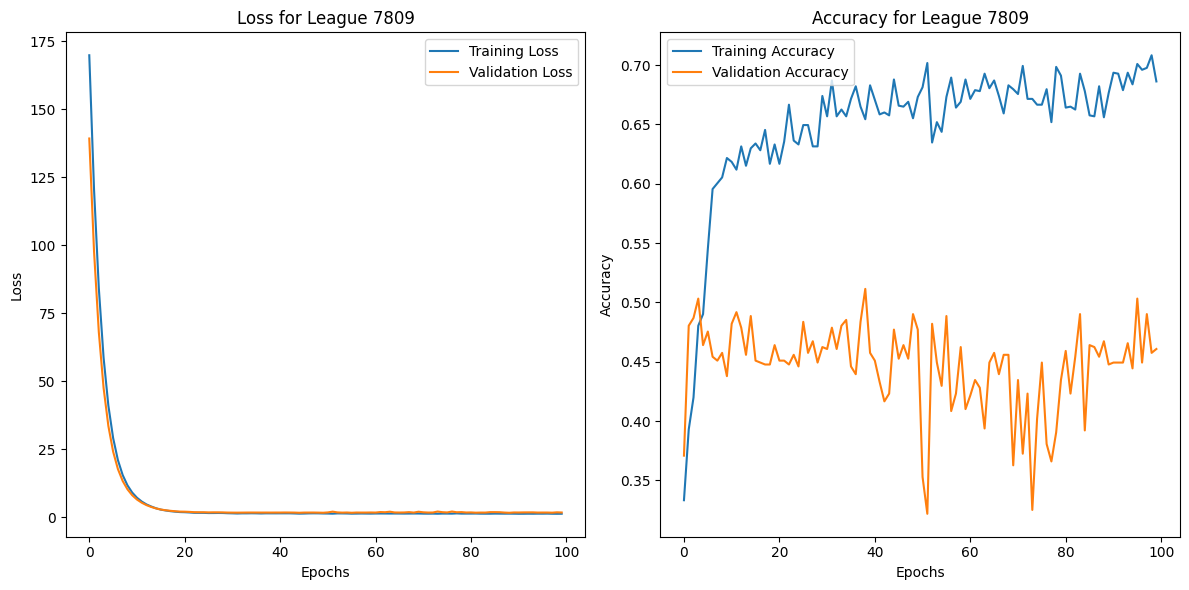

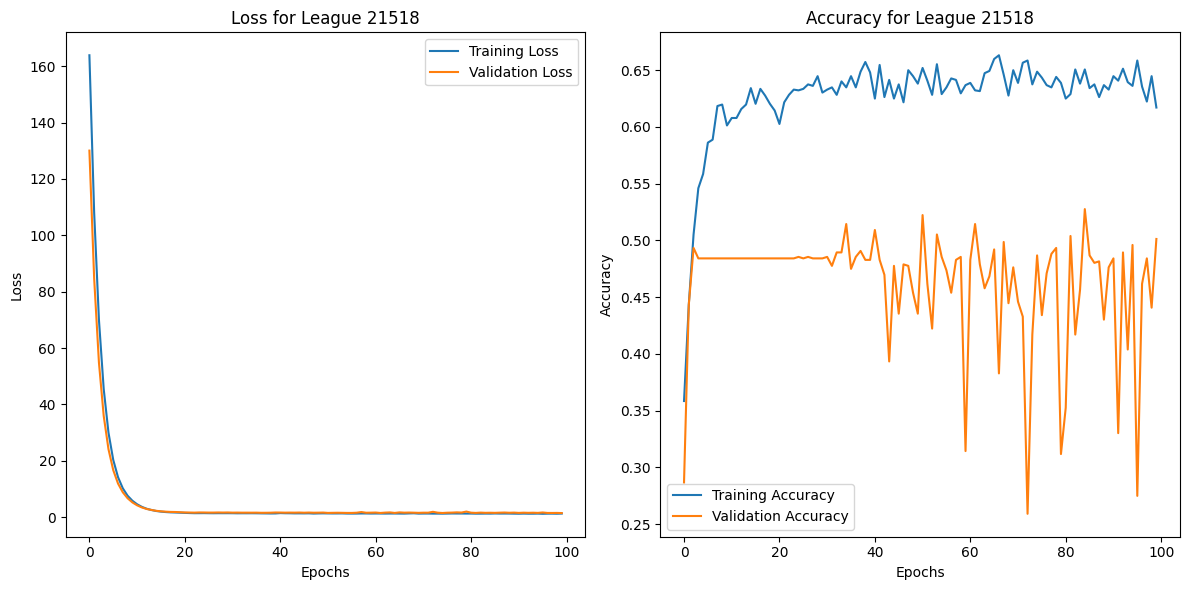

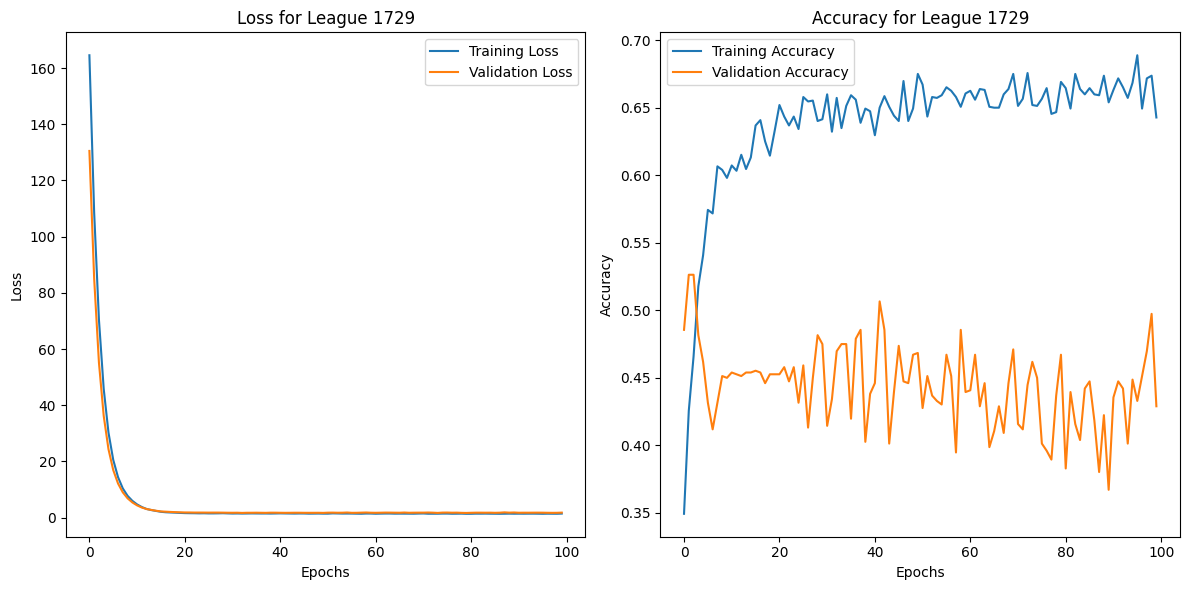

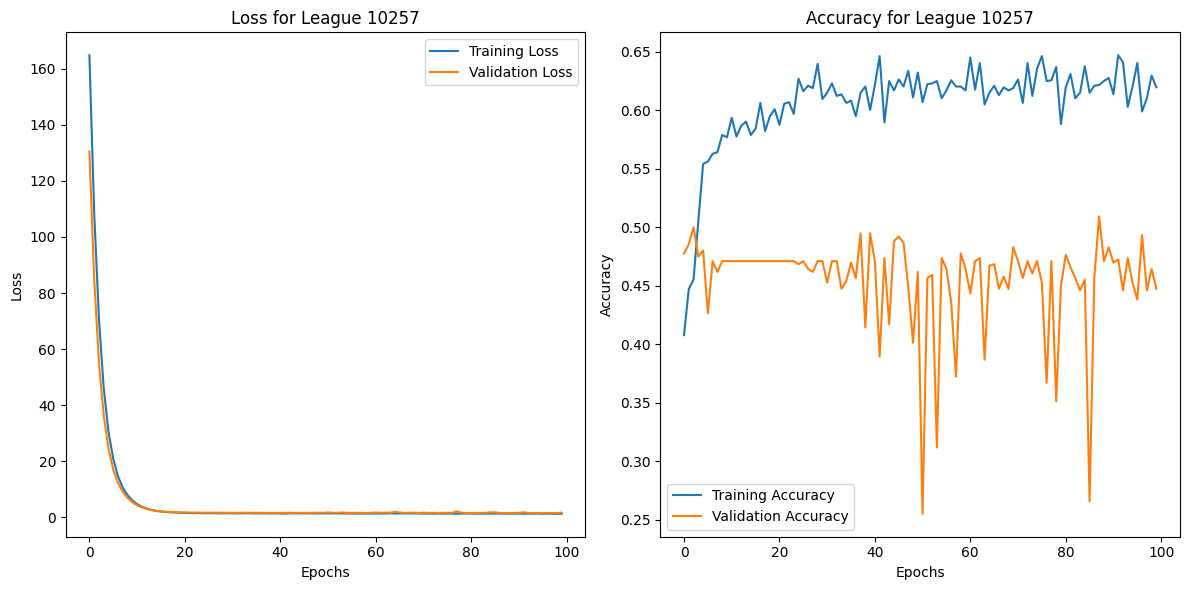

In [67]:
import matplotlib.pyplot as plt

# Plot loss and accuracy for each league
for league_id, data in trained_models.items():
    history = data["history"]
    
    # Plot Loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title(f"Loss for League {league_id}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    
    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history["accuracy"], label="Training Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title(f"Accuracy for League {league_id}")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    
    plt.tight_layout()
    plt.show()


Next we will combine the training, validation and test sets from different leagues and train/test our models on the combined sets to see if we can improve accuracy by cross-learning from multiple leagues 

In [19]:
# Combine league-specific data into unified datasets
X_train_combined = np.vstack([data["X_train"] for data in league_inputs.values()])
y_train_combined = np.hstack([data["y_train"] for data in league_inputs.values()])

X_val_combined = np.vstack([data["X_val"] for data in league_inputs.values()])
y_val_combined = np.hstack([data["y_val"] for data in league_inputs.values()])

X_test_combined = np.vstack([data["X_test"] for data in league_inputs.values()])
y_test_combined = np.hstack([data["y_test"] for data in league_inputs.values()])

# Replace NaN values with 0 in features
X_train_combined = np.nan_to_num(X_train_combined, nan=0.0)
X_val_combined = np.nan_to_num(X_val_combined, nan=0.0)
X_test_combined = np.nan_to_num(X_test_combined, nan=0.0)

# Normalize the combined datasets
scaler = StandardScaler()
X_train_combined = scaler.fit_transform(X_train_combined)  # Fit the scaler on the training set
X_val_combined = scaler.transform(X_val_combined)          # Transform validation set using the same scaler
X_test_combined = scaler.transform(X_test_combined)        # Transform test set using the same scaler

# Verify the shapes of the combined datasets
print("Combined Training Set Shape:", X_train_combined.shape, y_train_combined.shape)
print("Combined Validation Set Shape:", X_val_combined.shape, y_val_combined.shape)
print("Combined Test Set Shape:", X_test_combined.shape, y_test_combined.shape)

Combined Training Set Shape: (5762, 827) (5762,)
Combined Validation Set Shape: (2892, 827) (2892,)
Combined Test Set Shape: (2891, 827) (2891,)


In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2

#reset histroy
history = None

# Define the model architecture
model = Sequential([
    # Input layer
    Input(shape=(827,)),
    Dense(512, kernel_regularizer=l2(0.05)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),

    # Hidden layer 1
    Dense(256, kernel_regularizer=l2(0.05)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),

    # Hidden layer 2
    Dense(128, kernel_regularizer=l2(0.05)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),

    # Output layer
    Dense(3, activation="softmax")  # 3 classes: Home Win, Draw, Away Win
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Callbacks for training
checkpoint = ModelCheckpoint(
    "best_model.keras",  # Save the best model
    monitor="val_accuracy",  # Track validation accuracy
    save_best_only=True,  # Save only when val_accuracy improves
    mode="max",  # Maximize validation accuracy
    verbose=1
)

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=10,  # Stop training if validation loss doesn't improve for 10 epochs
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,  # Reduce learning rate by half
    patience=3,  # After 3 epochs of no improvement
    min_lr=1e-6,  # Lower bound on the learning rate
    verbose=1
)

# Train the model
history = model.fit(
    X_train_combined, y_train_combined,
    validation_data=(X_val_combined, y_val_combined),
    epochs=50,
    batch_size=64,
    callbacks=[checkpoint, early_stopping, reduce_lr],
    verbose=1
)

# Load the best saved model for testing
from tensorflow.keras.models import load_model

best_model = load_model("best_model.keras")
test_loss, test_accuracy = best_model.evaluate(X_test_combined, y_test_combined, verbose=0)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


NameError: name 'Sequential' is not defined

In [76]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2

#reset histroy
history = None

# Define the model architecture
model = Sequential([
    # Input layer
    Input(shape=(827,)),
    Dense(256, kernel_regularizer=l2(0.05)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),

    # Hidden layer 1
    Dense(128, kernel_regularizer=l2(0.05)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),

    # Hidden layer 2
    Dense(64, kernel_regularizer=l2(0.05)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),

    # Output layer
    Dense(3, activation="softmax")  # 3 classes: Home Win, Draw, Away Win
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Callbacks for training
checkpoint = ModelCheckpoint(
    "best_model.keras",  # Save the best model
    monitor="val_accuracy",  # Track validation accuracy
    save_best_only=True,  # Save only when val_accuracy improves
    mode="max",  # Maximize validation accuracy
    verbose=1
)

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=10,  # Stop training if validation loss doesn't improve for 10 epochs
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,  # Reduce learning rate by half
    patience=3,  # After 3 epochs of no improvement
    min_lr=1e-6,  # Lower bound on the learning rate
    verbose=1
)

# Train the model
history = model.fit(
    X_train_combined, y_train_combined,
    validation_data=(X_val_combined, y_val_combined),
    epochs=100,
    batch_size=32,
    callbacks=[checkpoint, early_stopping, reduce_lr],
    verbose=1
)

# Load the best saved model for testing
from tensorflow.keras.models import load_model

best_model = load_model("best_model.keras")
test_loss, test_accuracy = best_model.evaluate(X_test_combined, y_test_combined, verbose=0)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/100
164/181 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4504 - loss: 20.0890
Epoch 1: val_accuracy improved from -inf to 0.52420, saving model to best_model.keras
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4528 - loss: 19.2737 - val_accuracy: 0.5242 - val_loss: 3.0986 - learning_rate: 0.0010
Epoch 2/100
159/181 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4893 - loss: 2.5668
Epoch 2: val_accuracy improved from 0.52420 to 0.53458, saving model to best_model.keras
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4894 - loss: 2.5131 - val_accuracy: 0.5346 - val_loss: 1.5427 - learning_rate: 0.0010
Epoch 3/100
174/181 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5047 - loss: 1.4642
Epoch 3: val_accuracy did not improve from 0.53458
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5047 - loss: 1.4617 - val_accuracy: 0.4907 - val_loss: 1.3034 - learning_rate: 0.0010
Epoch 4/100
174/181 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5153 - loss: 1.2758
E

In [81]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, AdamW
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler

#reset histroy
history = None

# Define the model architecture
model = Sequential([
    # Input layer
    Input(shape=(827,)),
    Dense(256, kernel_regularizer=l2(0.1)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),

    # Hidden layer 1
    Dense(128, kernel_regularizer=l2(0.1)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),

    # Hidden layer 2
    Dense(64, kernel_regularizer=l2(0.1)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),

    # Output layer
    Dense(3, activation="softmax")  # 3 classes: Home Win, Draw, Away Win
])

# Compile the model
model.compile(
    # Optimizer: SGD with Nesterov Momentum
    optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Callbacks for training
checkpoint = ModelCheckpoint(
    "best_model.keras",  # Save the best model
    monitor="val_accuracy",  # Track validation accuracy
    save_best_only=True,  # Save only when val_accuracy improves
    mode="max",  # Maximize validation accuracy
    verbose=1
)

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=6,  # Stop training if validation loss doesn't improve for 10 epochs
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,  # Reduce learning rate by 10%
    patience=3,  # After 3 epochs of no improvement
    min_lr=1e-6,  # Lower bound on the learning rate
    verbose=1
)

# Train the model
history = model.fit(
    X_train_combined, y_train_combined,
    validation_data=(X_val_combined, y_val_combined),
    epochs=60,
    batch_size=64,
    callbacks=[checkpoint, early_stopping, reduce_lr],
    verbose=1
)

# Load the best saved model for testing
from tensorflow.keras.models import load_model

best_model = load_model("best_model.keras")
test_loss, test_accuracy = best_model.evaluate(X_test_combined, y_test_combined, verbose=0)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/60
84/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4203 - loss: 42.0573
Epoch 1: val_accuracy improved from -inf to 0.47095, saving model to best_model.keras
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4229 - loss: 40.6372 - val_accuracy: 0.4710 - val_loss: 6.6857 - learning_rate: 0.0010
Epoch 2/60
84/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4925 - loss: 4.9358
Epoch 2: val_accuracy did not improve from 0.47095
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4922 - loss: 4.8307 - val_accuracy: 0.4654 - val_loss: 2.1625 - learning_rate: 0.0010
Epoch 3/60
81/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4956 - loss: 2.1199
Epoch 3: val_accuracy did not improve from 0.47095
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4961 - loss: 2.1015 - val_accuracy: 0.4706 - val_loss: 1.5920 - learning_rate: 0.0010
Epoch 4/60
72/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4840 - loss: 1.6352
Epoch 4: val_accuracy improved from 0.47095 to 0.50000, s

In [92]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, AdamW
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler

#reset histroy
history = None

# Define the model architecture
model = Sequential([
    # Input layer
    Input(shape=(827,)),
    Dense(256, kernel_regularizer=l2(0.1)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),

    # Hidden layer 1
    Dense(128, kernel_regularizer=l2(0.1)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),

    # Hidden layer 2
    Dense(64, kernel_regularizer=l2(0.1)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),

    # Output layer
    Dense(3, activation="softmax")  # 3 classes: Home Win, Draw, Away Win
])

# Compile the model
model.compile(
    # Optimizer: RMSProp
    optimizer = RMSprop(learning_rate=0.001, rho=0.95),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Callbacks for training
checkpoint = ModelCheckpoint(
    "best_model.keras",  # Save the best model
    monitor="val_accuracy",  # Track validation accuracy
    save_best_only=True,  # Save only when val_accuracy improves
    mode="max",  # Maximize validation accuracy
    verbose=1
)

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=6,  # Stop training if validation loss doesn't improve for 10 epochs
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,  # Reduce learning rate by 10%
    patience=3,  # After 3 epochs of no improvement
    min_lr=1e-6,  # Lower bound on the learning rate
    verbose=1
)

# Train the model
history = model.fit(
    X_train_combined, y_train_combined,
    validation_data=(X_val_combined, y_val_combined),
    epochs=60,
    batch_size=64,
    callbacks=[checkpoint, early_stopping, reduce_lr],
    verbose=1
)

# Load the best saved model for testing
from tensorflow.keras.models import load_model

best_model = load_model("best_model.keras")
test_loss, test_accuracy = best_model.evaluate(X_test_combined, y_test_combined, verbose=0)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/60
86/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4614 - loss: 31.7111
Epoch 1: val_accuracy improved from -inf to 0.49239, saving model to best_model.keras
91/91 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4616 - loss: 30.8221 - val_accuracy: 0.4924 - val_loss: 4.7407 - learning_rate: 0.0010
Epoch 2/60
73/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4674 - loss: 3.8008
Epoch 2: val_accuracy did not improve from 0.49239
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4704 - loss: 3.6323 - val_accuracy: 0.4658 - val_loss: 1.9826 - learning_rate: 0.0010
Epoch 3/60
72/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 1.8317
Epoch 3: val_accuracy improved from 0.49239 to 0.53804, saving model to best_model.keras
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4858 - loss: 1.7924 - val_accuracy: 0.5380 - val_loss: 1.4134 - learning_rate: 0.0010
Epoch 4/60
66/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5249 - loss: 1.3778
Epoch 4: val_accura

In [136]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, AdamW
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler

#reset histroy
history = None

# Define the model architecture
model = Sequential([
    # Input layer
    Input(shape=(827,)),
    Dense(256, kernel_regularizer=l2(0.1)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),

    # Hidden layer 1
    Dense(128, kernel_regularizer=l2(0.1)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),

    # Hidden layer 2
    Dense(64, kernel_regularizer=l2(0.1)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),

    # Output layer
    Dense(3, activation="softmax")  # 3 classes: Home Win, Draw, Away Win
])

# Compile the model
model.compile(
    # Optimizer: AdaGrad
    optimizer = Adagrad(learning_rate=0.01),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Callbacks for training
checkpoint = ModelCheckpoint(
    "best_model.keras",  # Save the best model
    monitor="val_accuracy",  # Track validation accuracy
    save_best_only=True,  # Save only when val_accuracy improves
    mode="max",  # Maximize validation accuracy
    verbose=1
)

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=6,  # Stop training if validation loss doesn't improve for 10 epochs
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,  # Reduce learning rate by 10%
    patience=3,  # After 3 epochs of no improvement
    min_lr=1e-6,  # Lower bound on the learning rate
    verbose=1
)

# Train the model
history = model.fit(
    X_train_combined, y_train_combined,
    validation_data=(X_val_combined, y_val_combined),
    epochs=60,
    batch_size=64,
    callbacks=[checkpoint, early_stopping, reduce_lr],
    verbose=1
)

# Load the best saved model for testing
from tensorflow.keras.models import load_model

best_model = load_model("best_model.keras")
test_loss, test_accuracy = best_model.evaluate(X_test_combined, y_test_combined, verbose=0)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/60


/Users/sharanmehta/my_tf_venv/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


66/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4109 - loss: 54.9566  
Epoch 1: val_accuracy improved from -inf to 0.51798, saving model to best_model.keras
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4188 - loss: 51.5440 - val_accuracy: 0.5180 - val_loss: 23.0390 - learning_rate: 0.0100
Epoch 2/60
60/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5009 - loss: 20.0044
Epoch 2: val_accuracy did not improve from 0.51798
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4976 - loss: 18.6955 - val_accuracy: 0.5041 - val_loss: 9.7377 - learning_rate: 0.0100
Epoch 3/60
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4930 - loss: 8.2309
Epoch 3: val_accuracy did not improve from 0.51798
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4932 - loss: 8.2177 - val_accuracy: 0.4907 - val_loss: 5.0715 - learning_rate: 0.0100
Epoch 4/60
90/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5027 - loss: 4.4672
Epoch 4: val_accuracy did not improve from 0.51798
91/91 ━━━━━━

In [106]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, AdamW
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler

#reset histroy
history = None

# Define the model architecture
model = Sequential([
    # Input layer
    Input(shape=(827,)),
    Dense(256, kernel_regularizer=l2(0.1)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),

    # Hidden layer 1
    Dense(128, kernel_regularizer=l2(0.1)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),

    # Hidden layer 2
    Dense(64, kernel_regularizer=l2(0.1)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),

    # Output layer
    Dense(3, activation="softmax")  # 3 classes: Home Win, Draw, Away Win
])

# Compile the model
model.compile(
    # Optimizer: AdamW
    optimizer = AdamW(learning_rate=0.001, weight_decay=0.05),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Callbacks for training
checkpoint = ModelCheckpoint(
    "best_model.keras",  # Save the best model
    monitor="val_accuracy",  # Track validation accuracy
    save_best_only=True,  # Save only when val_accuracy improves
    mode="max",  # Maximize validation accuracy
    verbose=1
)

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=6,  # Stop training if validation loss doesn't improve for 10 epochs
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,  # Reduce learning rate by 10%
    patience=3,  # After 3 epochs of no improvement
    min_lr=1e-6,  # Lower bound on the learning rate
    verbose=1
)

# Train the model
history = model.fit(
    X_train_combined, y_train_combined,
    validation_data=(X_val_combined, y_val_combined),
    epochs=60,
    batch_size=64,
    callbacks=[checkpoint, early_stopping, reduce_lr],
    verbose=1
)

# Load the best saved model for testing
from tensorflow.keras.models import load_model

best_model = load_model("best_model.keras")
test_loss, test_accuracy = best_model.evaluate(X_test_combined, y_test_combined, verbose=0)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/60
66/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4326 - loss: 45.2715  
Epoch 1: val_accuracy improved from -inf to 0.47891, saving model to best_model.keras
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4383 - loss: 40.1825 - val_accuracy: 0.4789 - val_loss: 6.3089 - learning_rate: 0.0010
Epoch 2/60
79/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5012 - loss: 4.9025
Epoch 2: val_accuracy improved from 0.47891 to 0.48582, saving model to best_model.keras
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4994 - loss: 4.7481 - val_accuracy: 0.4858 - val_loss: 2.3064 - learning_rate: 0.0010
Epoch 3/60
77/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5131 - loss: 2.1130
Epoch 3: val_accuracy did not improve from 0.48582
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5110 - loss: 2.0861 - val_accuracy: 0.4806 - val_loss: 1.6425 - learning_rate: 0.0010
Epoch 4/60
78/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4973 - loss: 1.5735
Epoch 4: val_accu

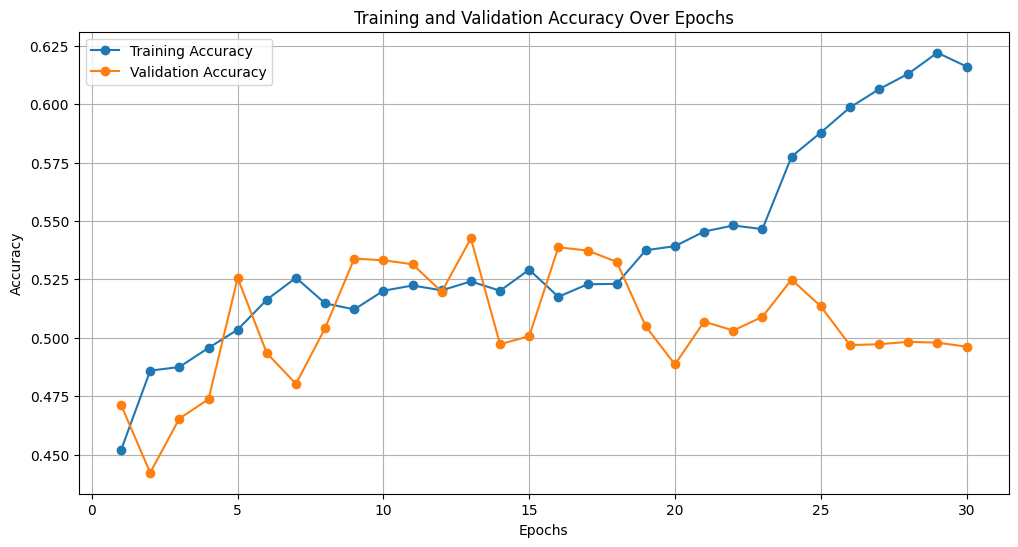

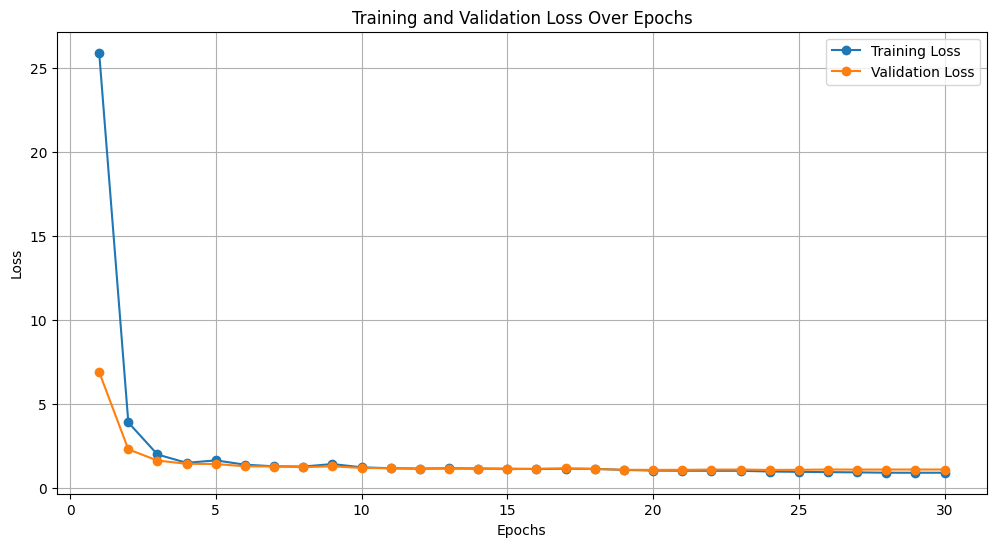

In [105]:
import matplotlib.pyplot as plt

# Extract the actual number of epochs trained (based on EarlyStopping)
actual_epochs = len(history.history['loss'])  # Dynamically fetch the length of training

# Extract accuracy and loss values for actual epochs
accuracy = history.history['accuracy'][:actual_epochs]
val_accuracy = history.history['val_accuracy'][:actual_epochs]
loss = history.history['loss'][:actual_epochs]
val_loss = history.history['val_loss'][:actual_epochs]
epochs = range(1, actual_epochs + 1)

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [107]:
from sklearn.metrics import accuracy_score
import numpy as np

# Function to calculate permutation importance
def permutation_importance(model, X_test, y_test, metric=accuracy_score):
    """
    Calculate feature importance by permuting each feature and evaluating the change in performance.
    
    Args:
        model: Trained model (expects TensorFlow/Keras model).
        X_test: Test features (numpy array).
        y_test: Test labels (numpy array).
        metric: Evaluation metric function (default: accuracy_score).
    
    Returns:
        Feature importances as a numpy array.
    """
    baseline_score = metric(y_test, np.argmax(model.predict(X_test), axis=1))
    importances = []

    for i in range(X_test.shape[1]):
        # Permute feature i
        X_test_permuted = X_test.copy()
        np.random.shuffle(X_test_permuted[:, i])

        # Evaluate performance with permuted feature
        score = metric(y_test, np.argmax(model.predict(X_test_permuted), axis=1))
        importances.append(baseline_score - score)

    return np.array(importances)

# Calculate permutation importance
importances = permutation_importance(best_model, X_test_combined, y_test_combined)

# Rank features by importance
sorted_indices = np.argsort(importances)[::-1]
top_features = sorted_indices[:30]  # Adjust to show top N features
print("Top 30 Features by Permutation Importance:")
for i in top_features:
    print(f"Feature {i}: Importance {importances[i]:.4f}")


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
91/91 ━━━━━━━━━━━━━━

In [109]:
# Updated list of top feature indices
top_feature_indices = [
    561, 105, 291, 512, 385, 235, 179, 327, 491, 826,
    360, 317, 365, 650, 355, 366, 282, 444, 432, 375,
    151, 806, 183, 530, 61, 55, 521, 747, 634, 217
]

# Map indices to feature names
top_feature_names = [model_features[i] for i in top_feature_indices]

# Display the feature names and their importance
for i, importance in zip(top_feature_indices, importances[top_feature_indices]):
    print(f"Feature Index: {i}, Feature Name: {model_features[i]}, Importance: {importance:.4f}")


Feature Index: 561, Feature Name: home_player_5_rolling_avg_last_5_goals_scored, Importance: 0.0014
Feature Index: 105, Feature Name: avg_goal_normal_rolling_5_home, Importance: 0.0010
Feature Index: 291, Feature Name: avg_shoton_rolling_40_home, Importance: 0.0010
Feature Index: 512, Feature Name: home_player_4_rolling_avg_last_5_crosses, Importance: 0.0010
Feature Index: 385, Feature Name: home_team_avg_volleys, Importance: 0.0010
Feature Index: 235, Feature Name: avg_cross_diff_rolling_20_home, Importance: 0.0010
Feature Index: 179, Feature Name: avg_goal_normal_opposing_rolling_20_away, Importance: 0.0010
Feature Index: 327, Feature Name: home_team_avg_curve, Importance: 0.0010
Feature Index: 491, Feature Name: away_player_3_cumulative_crosses, Importance: 0.0010
Feature Index: 826, Feature Name: away_player_11_rolling_avg_last_5_shotoff, Importance: 0.0007
Feature Index: 360, Feature Name: away_team_avg_overall_rating, Importance: 0.0007
Feature Index: 317, Feature Name: home_team

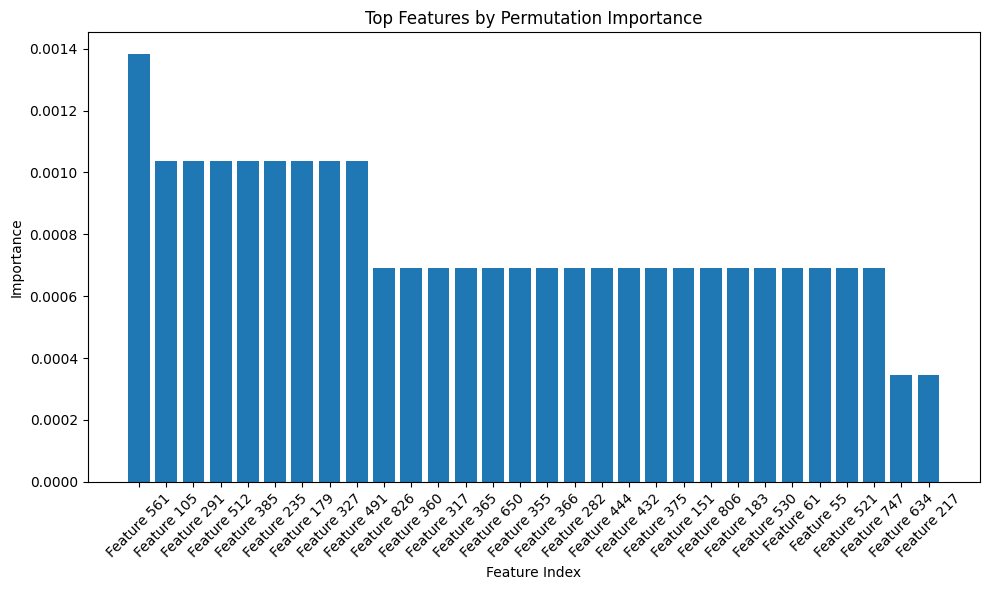

In [110]:
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_features)), importances[top_features], align="center")
plt.xticks(range(len(top_features)), [f"Feature {i}" for i in top_features], rotation=45)
plt.title("Top Features by Permutation Importance")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


In [23]:
# Group data by league and season
grouped_data = combined_df.groupby(["league_id", "season"])

# Initialize dictionaries to hold training and test sets for each league and season
train_sets = {}
test_sets = {}

# Iterate through each group (league_id, season)
for (league_id, season), group in grouped_data:
    # Sort matches within the group by date
    sorted_group = group.sort_values(by="date")

    # Define split sizes based on league_id
    if league_id in [1729, 10257, 21518]:
        train_size = 280  # First 280 matches for training
        # Test set takes all remaining matches
    elif league_id == 7809:
        train_size = 221  # First 221 matches for training
        # Test set takes all remaining matches
    else:
        raise ValueError(f"Unexpected league_id {league_id}")

    # Split the group
    train_set = sorted_group.iloc[:train_size]
    test_set = sorted_group.iloc[train_size:]

    # Check total matches for debugging
    total_matches = len(sorted_group)
    if total_matches < train_size:
        print(
            f"Group for league_id {league_id} and season {season} "
            f"has only {total_matches} matches (expected >= {train_size})."
        )

    # Create unique group keys
    train_key = f"league_{league_id}_season_{season}_train"
    test_key = f"league_{league_id}_season_{season}_test"

    # Save the splits
    train_sets[train_key] = train_set
    test_sets[test_key] = test_set

# Verification
print("Number of Training Groups:", len(train_sets))
print("Number of Test Groups:", len(test_sets))

# Example keys
print("Training set groups:", list(train_sets.keys())[:5])  # Display first 5 keys
print("Test set groups:", list(test_sets.keys())[:5])  # Display first 5 keys

Number of Training Groups: 32
Number of Test Groups: 32
Training set groups: ['league_1729_season_2008/2009_train', 'league_1729_season_2009/2010_train', 'league_1729_season_2010/2011_train', 'league_1729_season_2011/2012_train', 'league_1729_season_2012/2013_train']
Test set groups: ['league_1729_season_2008/2009_test', 'league_1729_season_2009/2010_test', 'league_1729_season_2010/2011_test', 'league_1729_season_2011/2012_test', 'league_1729_season_2012/2013_test']


In [24]:
# Function to merge and sort two sets by date
def merge_and_sort_sets(train_set, test_set):
    """
    Merge a training and test set, then sort by date.

    Args:
        train_set (pd.DataFrame): Training set DataFrame.
        test_set (pd.DataFrame): Test set DataFrame.

    Returns:
        pd.DataFrame: Combined DataFrame sorted by date.
    """
    combined_set = pd.concat([train_set, test_set], axis=0)
    combined_set = combined_set.sort_values(by="date").reset_index(drop=True)
    return combined_set

In [28]:
from sklearn.metrics import accuracy_score, f1_score
import tensorflow as tf
import pandas as pd

# Initialize a list to store results
results = []

# Helper function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = tf.argmax(model.predict(X_test), axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    loss, _ = model.evaluate(X_test, y_test, verbose=0)
    return accuracy, f1, loss

# Function to build and compile the model
def build_model(input_dim):
    model = Sequential([
        tf.keras.layers.Input(shape=(input_dim,)), 
        Dense(256, kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        tf.keras.layers.LeakyReLU(negative_slope=0.1),
        Dropout(0.3),
        Dense(128, kernel_regularizer=l2(0.1)),
        BatchNormalization(),
        tf.keras.layers.LeakyReLU(negative_slope=0.1),
        Dropout(0.3),
        Dense(64, kernel_regularizer=l2(0.1)),
        BatchNormalization(),
        tf.keras.layers.LeakyReLU(negative_slope=0.1),
        Dropout(0.2),
        Dense(3, activation="softmax"),
    ])

    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

# Iterate through seasons
merged_train_set = None
model = None  # Placeholder for the model
for season in [
    "2008/2009", "2009/2010", "2010/2011", "2011/2012",
    "2012/2013", "2013/2014", "2014/2015", "2015/2016"
]:
    # Merge training sets for all leagues in the current season
    current_train_set = pd.concat(
        [train_sets[f"league_{league_id}_season_{season}_train"] for league_id in [1729, 10257, 21518, 7809]], 
        axis=0
    )
    current_test_set = pd.concat(
        [test_sets[f"league_{league_id}_season_{season}_test"] for league_id in [1729, 10257, 21518, 7809]], 
        axis=0
    )
    
    # Combine with previous merged training set if available
    if merged_train_set is not None:
        merged_train_set = merge_and_sort_sets(merged_train_set, current_train_set)
    else:
        merged_train_set = current_train_set
    
    # Prepare training and test data
    X_train = merged_train_set[model_features].values
    y_train = merged_train_set[label_column].values
    X_test = current_test_set[model_features].values
    y_test = current_test_set[label_column].values

    # Build and compile the model
    model = build_model(input_dim=X_train.shape[1])

    # Callbacks
    checkpoint = ModelCheckpoint(
        "best_model.keras", monitor="val_accuracy", save_best_only=True, mode="max"
    )
    early_stopping = EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=3, min_lr=1e-6)

    # Train the model
    model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=50,
        batch_size=64,
        callbacks=[checkpoint, early_stopping, reduce_lr],
        verbose=1
    )

    # Evaluate the model
    accuracy, f1, loss = evaluate_model(model, X_test, y_test)

    # Store results
    results.append({
        "season": season,
        "test_accuracy": accuracy,
        "weighted_f1_score": f1,
        "test_loss": loss
    })

    print(f"Season {season}: Test Accuracy = {accuracy:.4f}, Weighted F1 = {f1:.4f}, Test Loss = {loss:.4f}")

# Convert results to a DataFrame for easier visualization
results_df = pd.DataFrame(results)




Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4060 - loss: 26.8463 - val_accuracy: 0.5221 - val_loss: 19.8138 - learning_rate: 0.0010
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4818 - loss: 18.0529 - val_accuracy: 0.5429 - val_loss: 14.2303 - learning_rate: 0.0010
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5325 - loss: 13.0651 - val_accuracy: 0.5584 - val_loss: 10.2838 - learning_rate: 0.0010
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5241 - loss: 9.5633 - val_accuracy: 0.3974 - val_loss: 7.8251 - learning_rate: 0.0010
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5731 - loss: 7.0872 - val_accuracy: 0.5013 - val_loss: 6.0351 - learning_rate: 0.0010
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5127 - loss: 5.4355 - val_accuracy: 0.5325 - val_loss: 4.5592 - learning_rate: 0.0010
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5418 - loss: 4.2717 - val_accu

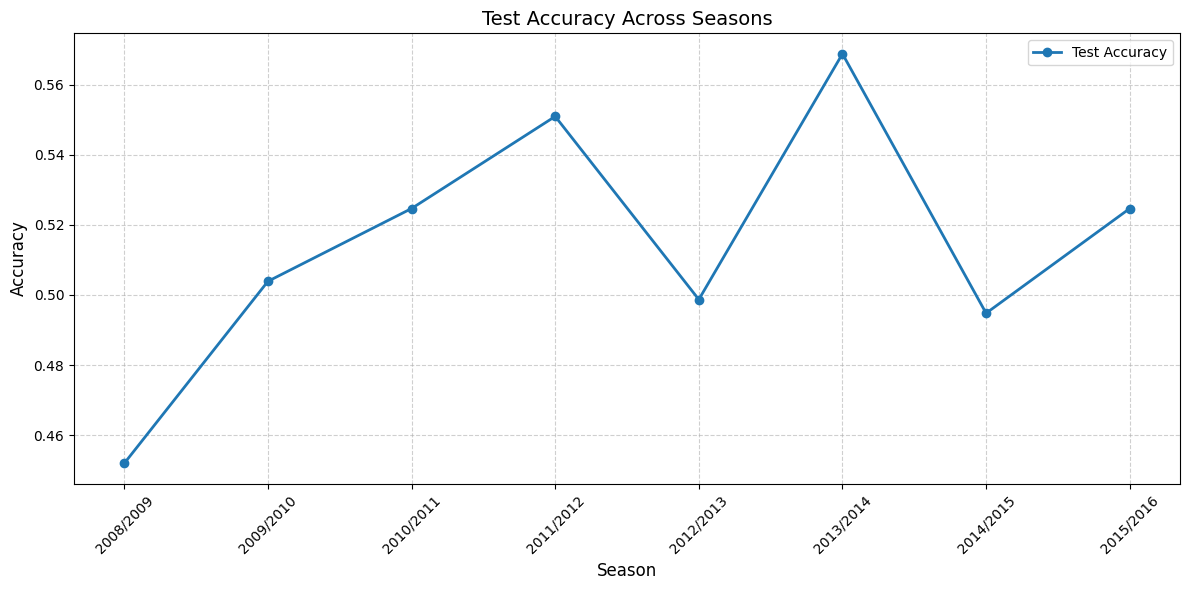

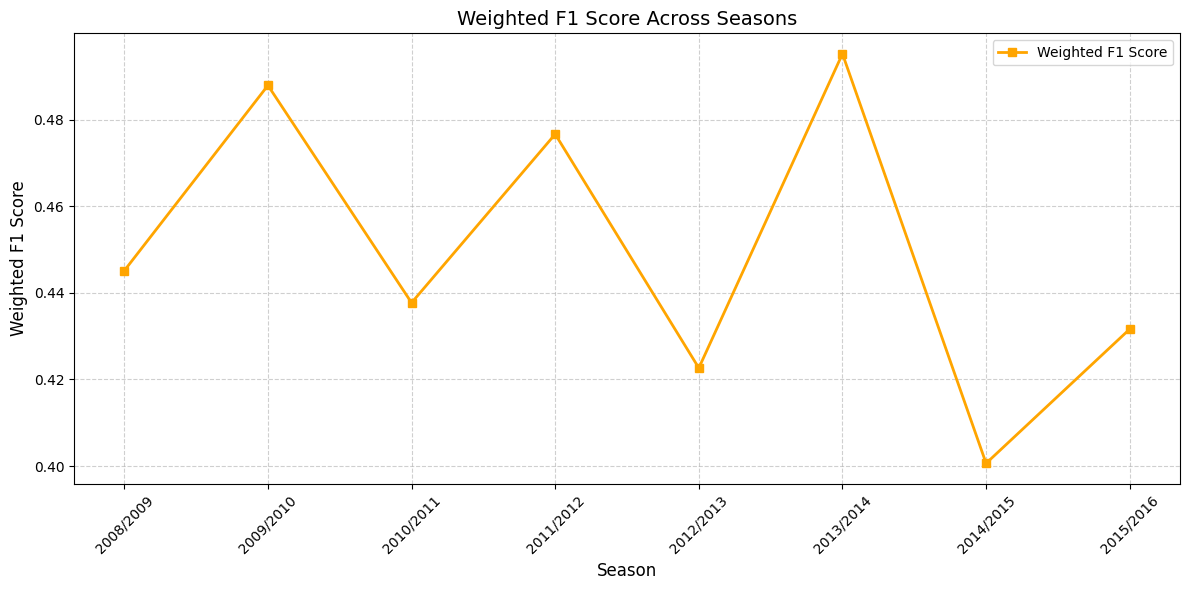

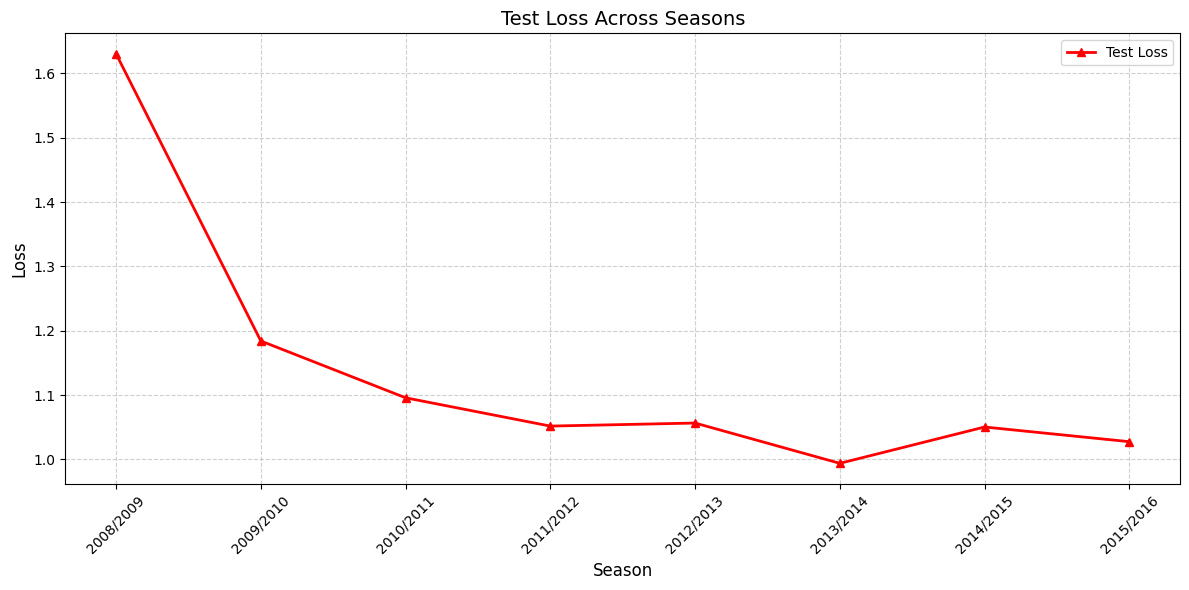

In [29]:
import matplotlib.pyplot as plt

# Assuming `results_df` is your DataFrame containing:
# - 'season': List of seasons.
# - 'test_accuracy': Accuracy for each season.
# - 'weighted_f1_score': F1 score for each season.
# - 'test_loss': Loss for each season.

# Sort the DataFrame by season if not already sorted
results_df = results_df.sort_values(by="season")

# Extract metrics for plotting
seasons = results_df["season"]
test_accuracy = results_df["test_accuracy"]
weighted_f1 = results_df["weighted_f1_score"]
test_loss = results_df["test_loss"]

# Plot Accuracy
plt.figure(figsize=(12, 6))
plt.plot(seasons, test_accuracy, marker="o", label="Test Accuracy", linewidth=2)
plt.title("Test Accuracy Across Seasons", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Weighted F1 Score
plt.figure(figsize=(12, 6))
plt.plot(seasons, weighted_f1, marker="s", label="Weighted F1 Score", linewidth=2, color="orange")
plt.title("Weighted F1 Score Across Seasons", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Weighted F1 Score", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Test Loss
plt.figure(figsize=(12, 6))
plt.plot(seasons, test_loss, marker="^", label="Test Loss", linewidth=2, color="red")
plt.title("Test Loss Across Seasons", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [229]:
def compute_permutation_importance_batch(model, X_test, y_test, metric=accuracy_score, n_repeats=5, batch_size=10):
    """
    Compute feature importance using batch-based permutation importance.

    Args:
        model: Trained neural network model (Keras/TensorFlow).
        X_test (np.ndarray): Test features.
        y_test (np.ndarray): Test labels.
        metric (function): Evaluation metric (default: accuracy_score).
        n_repeats (int): Number of times to permute each feature.
        batch_size (int): Number of features to permute simultaneously.

    Returns:
        feature_importances (np.ndarray): Mean importance scores for each feature.
    """
    baseline_performance = metric(y_test, np.argmax(model.predict(X_test), axis=1))
    n_features = X_test.shape[1]
    feature_importances = np.zeros(n_features)

    print(f"Baseline performance: {baseline_performance:.4f}")

    # Process features in batches
    for start_idx in range(0, n_features, batch_size):
        end_idx = min(start_idx + batch_size, n_features)
        batch_indices = range(start_idx, end_idx)
        batch_importances = np.zeros(len(batch_indices))

        for _ in range(n_repeats):
            X_test_permuted = X_test.copy()
            for idx in batch_indices:
                np.random.shuffle(X_test_permuted[:, idx])  # Shuffle features in the batch

            # Compute performance with permuted features
            batch_performance = metric(y_test, np.argmax(model.predict(X_test_permuted), axis=1))

            # Calculate importance for each feature in the batch
            for i, idx in enumerate(batch_indices):
                batch_importances[i] += (baseline_performance - batch_performance) / n_repeats

        # Store batch importances
        for i, idx in enumerate(batch_indices):
            feature_importances[idx] = batch_importances[i]

        print(f"Processed features {start_idx + 1} to {end_idx}/{n_features}...")

    return feature_importances

In [232]:
importances = compute_permutation_importance_batch(model, X_test, y_test, batch_size=23)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Baseline performance: 0.5143
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step
Processed features 1 to 23/827...
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step
Processed features 24 to 46/827...
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step
Processed features 47 to 69/827...
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step
Processed featu

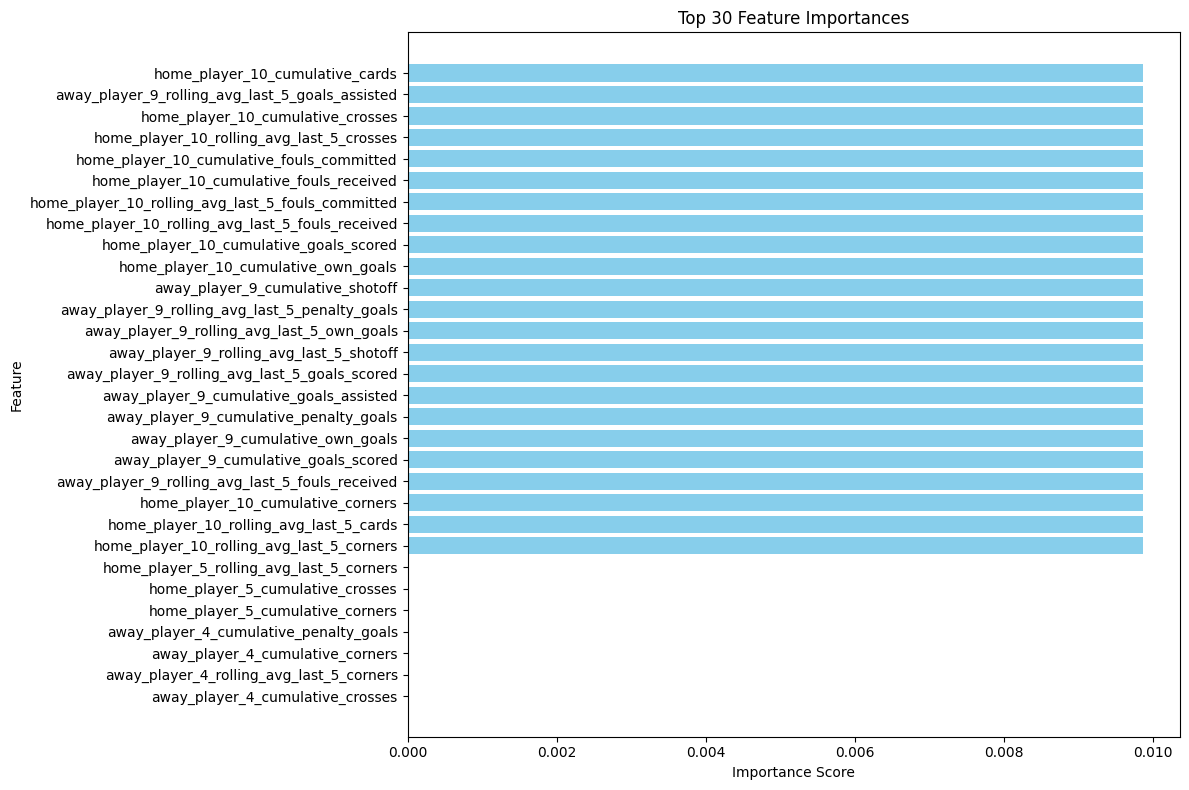

In [234]:
import matplotlib.pyplot as plt

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_features = [model_features[i] for i in sorted_indices]

# Plot top 30 features
plt.figure(figsize=(12, 8))
plt.barh(sorted_features[:30][::-1], sorted_importances[:30][::-1], color="skyblue")
plt.title("Top 30 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
